In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from google.colab import drive

file_path = '/content/GOOGL.csv'

In [2]:
# Load the dataset
df = pd.read_csv(file_path, sep = ",")

In [3]:
# Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

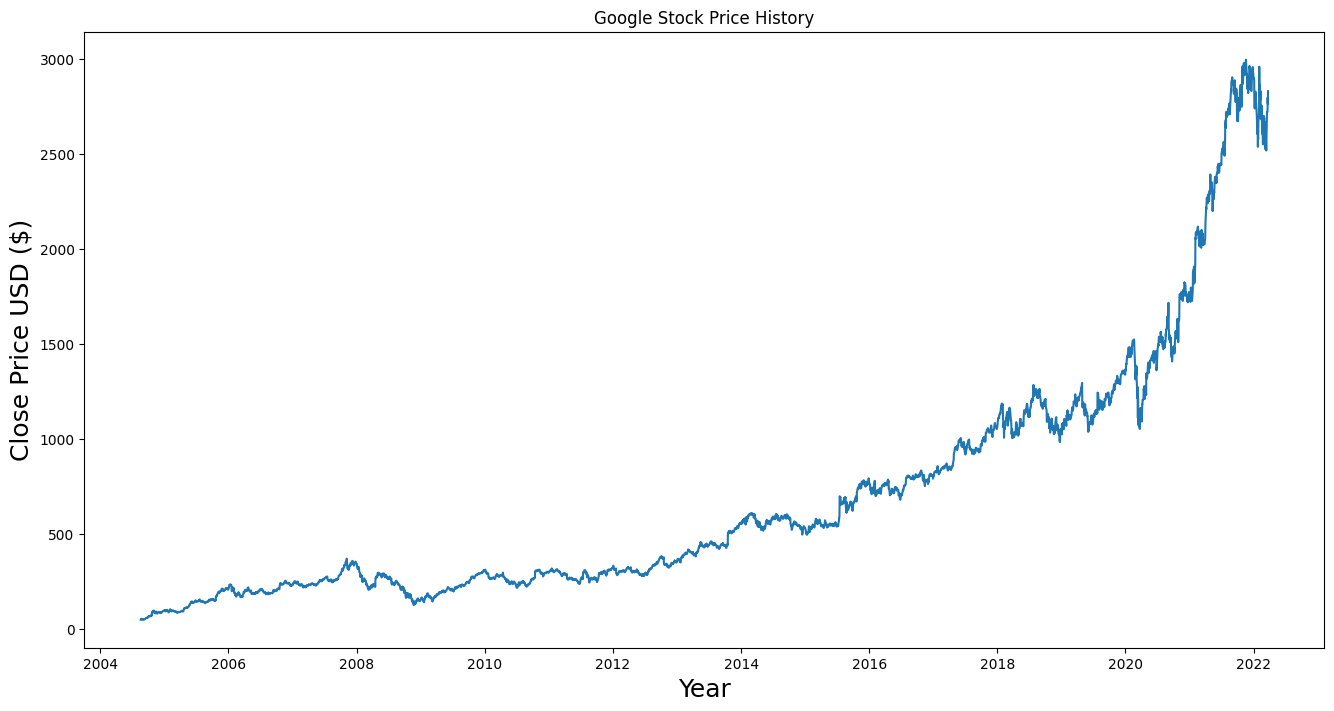

In [4]:
# Visualize the dataset
plt.figure(figsize=(16,8))
plt.title('Google Stock Price History')
plt.plot(df['Close'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

In [6]:
# Convert the dataframe to a numpy array
dataset = data.values

In [7]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil(0.8 * len(dataset)))

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [9]:
# Create the training data
train_data = scaled_data[0:training_data_len, :]

In [10]:
# Define time_steps
time_steps = 30

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, 0])
    y_train.append(train_data[i, 0])

In [11]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the data for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [13]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
3515/3515 [==============================] - 79s 21ms/step - loss: 2.0974e-04
Epoch 2/5
3515/3515 [==============================] - 70s 20ms/step - loss: 8.2077e-05
Epoch 3/5
3515/3515 [==============================] - 74s 21ms/step - loss: 5.4938e-05
Epoch 4/5
3515/3515 [==============================] - 73s 21ms/step - loss: 4.2671e-05
Epoch 5/5
3515/3515 [==============================] - 72s 20ms/step - loss: 3.6923e-05


In [16]:
# Create the testing data
test_data = scaled_data[training_data_len - time_steps:, :]

In [17]:
# Split the data into x_test and y_test datasets
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0])

In [18]:
# Convert x_test to a numpy array
x_test = np.array(x_test)

In [19]:
# Reshape the data for LSTM input
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
# Get the predicted stock prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 1s 11ms/step


In [21]:
# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

<ipython-input-22-91c8155f69f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


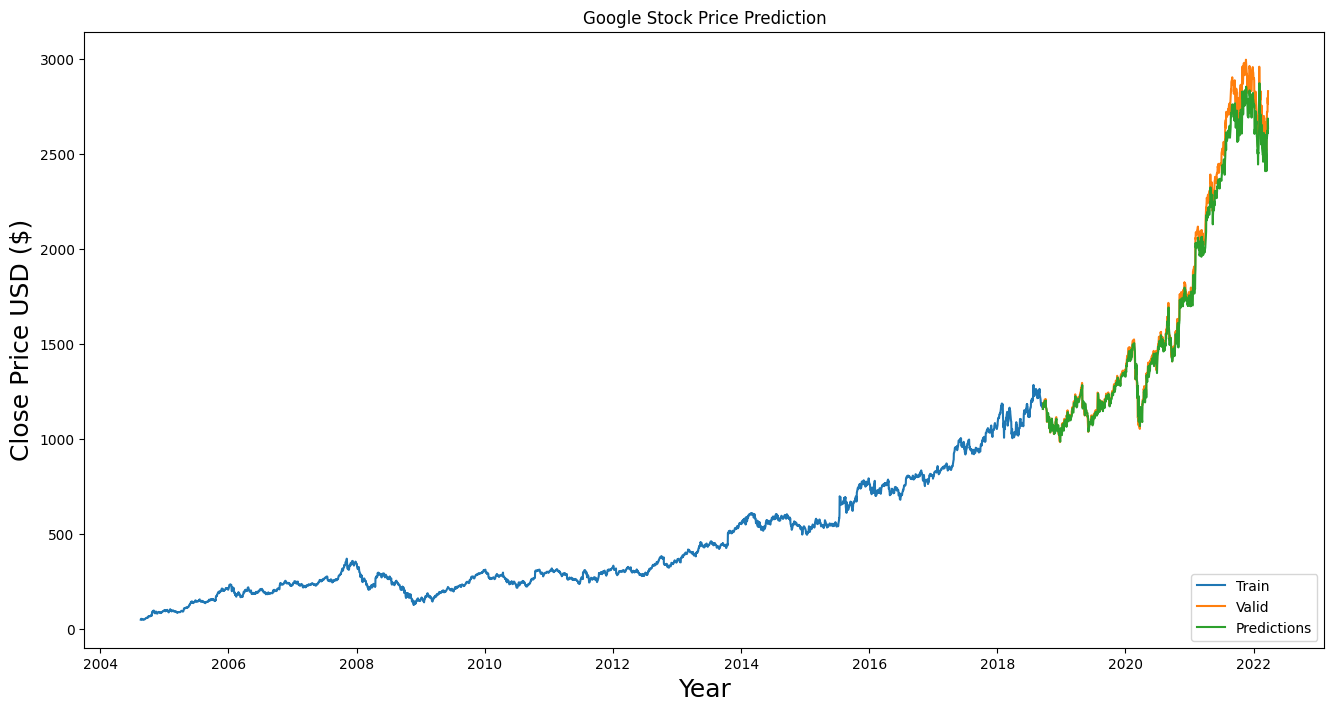

In [22]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Google Stock Price Prediction')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
print(rmse)

49.151383720912015
